In [1]:
# Importing the open-sourced MySQL Sakila Database(DB) to Python, by importing the sqlite3 package.
# Importing as well the other packages we will later need.

import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mydb = sqlite3.connect('/Users/davidgomez/Desktop/Python Exploratory Analysis/sakila.db')


In [2]:
# Writing a function to verify the DB has been succesfully imported

if mydb:
    print("Connection Successful")
else:
    print("Connection Unsuccessful")


Connection Successful


In [3]:
# Importing the desired Pandas dataframe by executing the following SQL query on the `mydb`
# SQL database. Setting the index column, and parsing dates for better data handling.

df = pd.read_sql_query('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', mydb, index_col='rental_id', parse_dates=['rental_date', 'return_date'])


In [4]:
# Once the Database has been successfully imported and the Dataframe (df) has been created, 
# let's now explore the Dataframe.

df.describe()

,store_id,film_rental_duration,film_rental_rate,film_replacement_cost
count,16044.000000,16044.00000,16044.000000,16044.000000
mean,1.506171,4.93549,2.942630,20.215443
std,0.499978,1.40169,1.649678,6.081771
min,1.000000,3.00000,0.990000,9.990000
25%,1.000000,4.00000,0.990000,14.990000
50%,2.000000,5.00000,2.990000,20.990000
75%,2.000000,6.00000,4.990000,25.990000
max,2.000000,7.00000,4.990000,29.990000


In [5]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


In [6]:
df.shape


(16044, 10)

In [7]:
# The Dataframe contains 16044 rows and 10 columns.

In [8]:
# Data Cleaning. First, I will check for null values in our DataFrame and will drop them.

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16044 entries, 1 to 16049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   rental_date            16044 non-null  datetime64[ns]
 1   return_date            15861 non-null  datetime64[ns]
 2   customer_lastname      16044 non-null  object        
 3   store_id               16044 non-null  int64         
 4   rental_store_city      16044 non-null  object        
 5   film_title             16044 non-null  object        
 6   film_rental_duration   16044 non-null  int64         
 7   film_rental_rate       16044 non-null  float64       
 8   film_replacement_cost  16044 non-null  float64       
 9   film_rating            16044 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 1.3+ MB


rental_date                0
return_date              183
customer_lastname          0
store_id                   0
rental_store_city          0
film_title                 0
film_rental_duration       0
film_rental_rate           0
film_replacement_cost      0
film_rating                0
dtype: int64

In [11]:
# We have 183 missing records of `return_dates`, which may be due to unreturned movies
# at the time the DataBase was imported.
# In this case, dropping the NaN values (blank return_date values) does not seem viable, as we need those
# records to ensure the rentals are actually returned. 

In [ ]:
# However, below I will comment out the code for how I would do it,
# if this were to be done.
'''
df = df.dropna() #Changes are mostly inmutable in Pandas, so to make them permanent, I would need to modify the
#DataFrame df.
df.info() #The records would have been reduced to 15,861, after dropping the 183 missing records. '''

In [13]:
# Let's now do the requested Exploratory Analysis of the df DataFrame.

# Question #1. What is the mean of rental duration for all films?

round(df['film_rental_duration'].mean(),2)

# Answer: The films are rented for an average of 4.94 days before they are returned.

4.94

<AxesSubplot:>

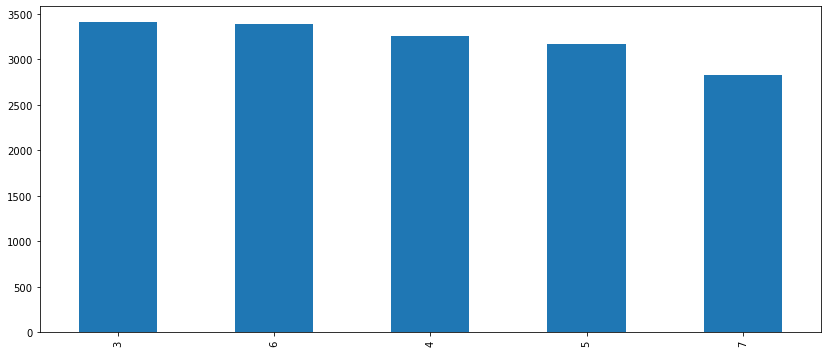

In [14]:
# Question #2. What is the most common rental duration?

df['film_rental_duration'].value_counts()
df['film_rental_duration'].value_counts().plot(kind= 'bar', figsize=(14,6))

# Answer: The most common rental duration is 3 days, with 3,412 rentals.

<AxesSubplot:ylabel='film_rental_rate'>

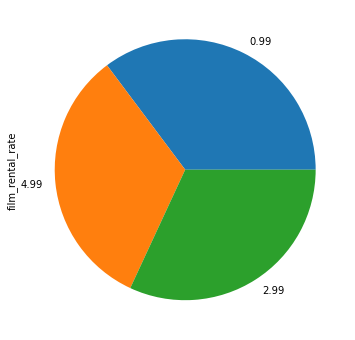

In [15]:
# Question #3. What is the most common rental rate?

df['film_rental_rate'].value_counts()
df['film_rental_rate'].value_counts().plot(kind= 'pie', figsize=(6,6))

# Answer: The most common rental rate is 0.99 USD, with 5,652 titles renting at that price.


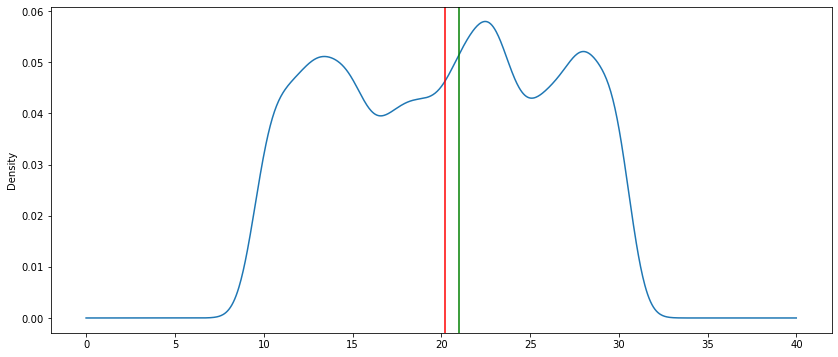

In [16]:
# Question #4. How is the replacement cost distributed?

ax = df['film_replacement_cost'].plot(kind='density', figsize=(14,6))
ax.axvline(df['film_replacement_cost'].mean(), color='red')
ax.axvline(df['film_replacement_cost'].median(), color='green')


<AxesSubplot:>

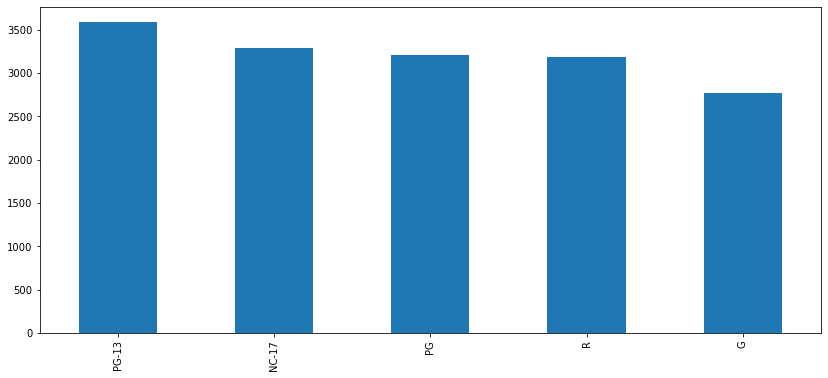

In [17]:
# Question #5. How many films of each rating does the store have?

df['film_rating'].value_counts()
df['film_rating'].value_counts().plot(kind= 'bar', figsize=(14,6))

# Answer: The DVD rental store has 3,585 PG-13 titles, 3,293 NC-17 films, 3,212 PG, 3,181 R, and 2,773 G-rated movies.

<AxesSubplot:title={'center':'film_replacement_cost'}, xlabel='[film_rating]'>

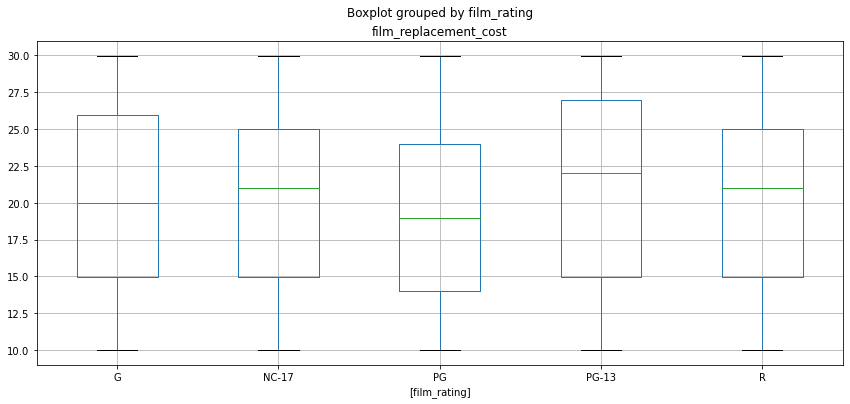

In [18]:
# Question #6. Does the film replacement cost vary depending on film rating?

df[['film_replacement_cost', 'film_rating']].boxplot(by='film_rating', figsize=(14,6))

# Answer: By analyzing the box chart, we can conclude that yes, film
# replacement cost varies across film ratings. In fact, this is highest for PG-13 movies
# and lowest for PG-rated titles.

In [19]:
# Question #7. Give us the rental period in days.

df['rental_days'] = df[['rental_date','return_date']].apply (lambda x: (x[1]-x[0]).days, axis=1)
df['rental_days'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

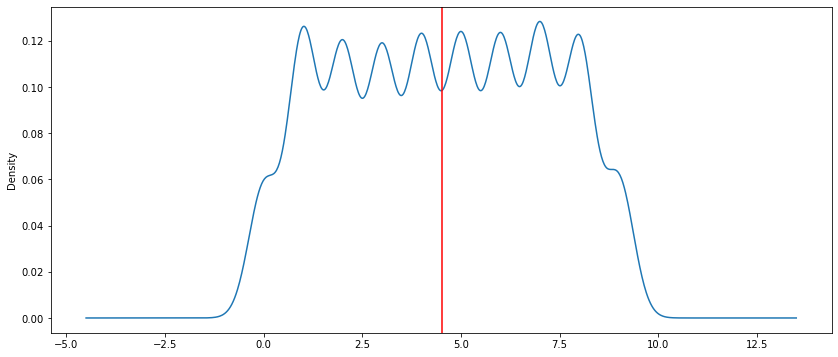

In [20]:
# Question #8. How are the rental days distributed?

ax = df['rental_days'].plot(kind= 'density', figsize=(14,6))
ax.axvline(df['rental_days'].mean(), color = 'red')


In [21]:
# Question #9. What is the highest daily rental rate for the films?

df['daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']

df ['daily_rental_rate'].sort_values(ascending=False).head(1)

# The highest daily rental rate is 1.66 USD.

rental_id
14763    1.663333
Name: daily_rental_rate, dtype: float64

In [29]:
# Question #10. What are the titles of the 5 films with the lowest daily rental rate?

lowest = df.loc[df['daily_rental_rate'] == df['daily_rental_rate'].min()].head(5)
print(lowest['film_title'])

# Answer: The top 5 titles with the lowest daily rental are  as follows: Roman Punk,
# Borrowers Bedazzled, Gun Bonnie, Greedy Roots, and Patient Sister.


rental_id
18             ROMAN PUNK
37    BORROWERS BEDAZZLED
48             GUN BONNIE
74           GREEDY ROOTS
76         PATIENT SISTER
Name: film_title, dtype: object


In [23]:
# Question #11. What are the titles of the 3 films with the highest daily rental rate?

highest = df.loc[df['daily_rental_rate'] == df['daily_rental_rate'].max()].head(3)
print(highest['film_title'])

# Answer: The top 3 titles with the highest daily rental are as follows: King Evolution,
# Minds Truman, Teen Apollo.

rental_id
13    KING EVOLUTION
40      MINDS TRUMAN
68       TEEN APOLLO
Name: film_title, dtype: object


In [24]:
# Question #12. How many rentals were made in Lethbridge city?

df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

# Answer: 7,923 rentals were made in Lethbridge city.

7923

In [26]:
# Question #13. How many rentals were made in Woodridge city with a rental duration higher than 5 days?

df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]

# Answer: 3,186 films with a rental duration of more than 5 days were rented in Woodridge.


3186

In [27]:
# Question #14. How many rentals were made at the store with id 2 or with a replacement cost lower than 10.99 USD?

df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] < 10.99)].shape[0]

# Answer: 8,444 rentals that either have a replacement cost lower than 10.99 USD or were rented from store_id 2.

8444